# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [11]:
import pandas as pd
blast_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

table_columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives', 'bonds', 'publications']

blast_data = pd.read_csv(blast_url,
                         comment="#",
                         names=table_columns,
                         usecols=table_columns,
                         index_col="subject acc.ver",
                         na_values=['-'],
                         engine='python'
                       )

blast_data = blast_data.iloc[1:, :] # get rid of NaN row
blast_data.head(5)
blast_data.drop('query acc.ver', axis=1)

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3.0
AEN03421.1,99.686,318,1,0,1,318,1,318,0,626,99.69,"12,444",39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,"17,348",6.0
ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,"7,105",19.0
YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,"18,940",37.0


### Question 2
What is the average number of publications?

In [12]:
# prompt: What is the average number of publications?

avg_publications = blast_data['publications'].mean()
avg_publications

27.177083333333332

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [13]:
blast_data['bonds'] = blast_data['bonds'].str.strip().str.replace(',', '')
blast_data['bonds'] = pd.to_numeric(blast_data['bonds'])
bonds = blast_data[blast_data['bonds'] > 15000]
bonds.iloc[:, 12]

,bonds
subject acc.ver,
AGK29621.1,17947
AHG32084.1,18964
6G2J_H,15663
YP_002791042.1,15830
AGK29634.1,17381
0806162F,17499
YP_009112408.1,16861
YP_001876469.1,16274
YP_009092269.1,16170


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

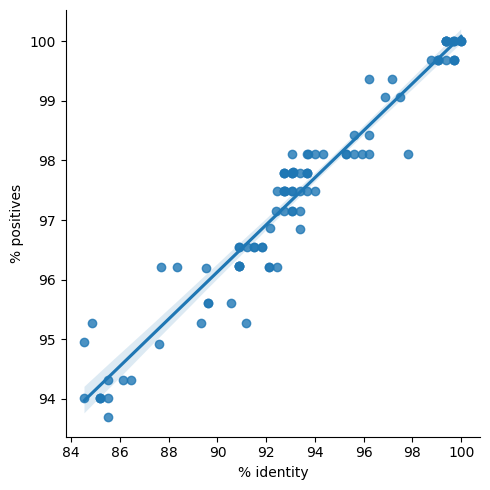

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=blast_data,
    x='% identity',
    y='% positives'
)

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [16]:
# prompt: Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

protein_source_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"
protein_source_data = pd.read_csv(protein_source_url)

blast_data = blast_data.assign(Protein_source='NA')

for index, row in blast_data.iterrows():
  if index in protein_source_data['Protein'].values:
    blast_data.loc[index, 'Protein_source'] = protein_source_data.loc[protein_source_data['Protein'] == index, 'Source'].iloc[0]

print(blast_data.head())

                query acc.ver  % identity  alignment length  mismatches  \
subject acc.ver                                                           
AGK29621.1        YP_220550.1      99.686               318           1   
YP_220563.1       YP_220550.1      99.686               318           1   
ACM24502.1        YP_220550.1      99.686               318           1   
AHG32084.1        YP_220550.1      99.371               318           2   
AEN03421.1        YP_220550.1      99.686               318           1   

                 gap opens  q. start  q. end  s. start  s. end  evalue  \
subject acc.ver                                                          
AGK29621.1               0         1     318         1     318       0   
YP_220563.1              0         1     318         1     318       0   
ACM24502.1               0         1     318         1     318       0   
AHG32084.1               0         1     318         1     318       0   
AEN03421.1               0    